<a href="https://colab.research.google.com/github/luciedum-dot/Intro-to-data-analysis-with-Python---Final-Project/blob/main/Evolutions_of_Criminality_France_2016_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Data Cleaning notebook
This notebook will be used for the first part of our project, which is data cleaning


In [ ]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
!git clone https://github.com/luciedum-dot/Intro-to-data-analysis-with-Python---Final-Project.git



fatal: destination path 'Intro-to-data-analysis-with-Python---Final-Project' already exists and is not an empty directory.


# **Part 1: Has criminality been on a rise in the past years?**

##Read and pivot Excel File - mec

In [ ]:
#Read Excel File - total accused people and display the sheets' names

path = "Intro-to-data-analysis-with-Python---Final-Project/Data/mec.xlsx"

xls = pd.ExcelFile(path)
xls.sheet_names


['Lisez moi',
 '1.sexe - age',
 '2.nationalité',
 '3.sexe',
 '4.nationalité majmin',
 '5.PM - PP']

In [ ]:
#Show the Excel File on the sheet sex, in order to look at the "total" line for every year and see the trend

#Read Excel on the sheet 3.sexe, skipping the first 2 rows and setting multiple headers (years and categories)
df = pd.read_excel(path, sheet_name="3.sexe", skiprows=2, header=[0, 1])

#Remove the 1st empty column of the sheet
df = df.iloc[:,1:]

#Pivot the year header
pivoted_df = (
    df
    .set_index("Sexe")
    .stack(level=1, future_stack=True)          # move second header to rows & future_stack=True just allow us to avoid a warning
    .reset_index()           # make it a column
    .rename(columns={"level_1": "Année"})
  )

#Cast the type of Sexe column from tupple to string
pivoted_df["Sexe"] = pivoted_df["Sexe"].str[0]

pivoted_df.head(30)

,Sexe,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Tentatives d'homicide,Violences physiques dans le cadre intra-familial,Violences physiques hors cadre intra-familial,Violences sexuelles,Viols et tentatives de viols,Vols avec arme,Vols violents sans arme,Vols sans violence contre des personnes,Cambriolages de logement,Vols de véhicule,Vols dans les véhicule,Vols d'accessoires sur les véhicules,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiements,Trafic de stupéfiants,Usage de stupéfiants
0,Femme,2016,135,195,15202,21601,1735,179,257,1574,16709,2953,991,1018,297,7981,20123,3489,16569
1,Femme,2017,174,196,16166,22340,1744,157,285,1398,16490,2898,959,1437,361,8435,19650,3693,17431
2,Femme,2018,188,197,16964,23212,2226,212,235,1389,16756,3021,1087,1303,258,8537,19190,3996,17267
3,Femme,2019,159,209,19064,22809,2166,264,239,1224,16352,3458,875,934,325,9433,17646,4275,16410
4,Femme,2020,148,254,22112,20139,2367,329,240,1137,13291,2548,892,964,404,8740,15767,3680,14221
5,Femme,2021,163,258,27604,21514,2731,419,216,982,14264,2396,983,1181,206,8378,16538,4015,17730
6,Femme,2022,173,294,32347,21104,2846,524,213,970,12799,2549,975,1040,316,7955,13251,4293,19178
7,Femme,2023,217,347,38058,22519,3154,644,253,1095,13423,2853,1285,841,310,8467,13499,4397,21969
8,Femme,2024,192,345,41543,22977,3642,739,273,905,12694,2729,1257,957,272,8665,12668,5090,21888
9,Homme,2016,851,1676,81190,105280,36515,10502,5474,17477,56807,39796,25072,24294,7220,70230,43860,37230,165861


##Display the df-mec just for Sex=Total

In [ ]:
#Visualize just the total column
#An other way to do it, but less reliable :df_total = pivoted_df.loc[18:26] #df_total.head(10)
df_total = pivoted_df[pivoted_df["Sexe"] == "Total"]
display(df_total)


,Sexe,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Tentatives d'homicide,Violences physiques dans le cadre intra-familial,Violences physiques hors cadre intra-familial,Violences sexuelles,Viols et tentatives de viols,Vols avec arme,Vols violents sans arme,Vols sans violence contre des personnes,Cambriolages de logement,Vols de véhicule,Vols dans les véhicule,Vols d'accessoires sur les véhicules,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiements,Trafic de stupéfiants,Usage de stupéfiants
18,Total,2016,986,1871,96392,126881,38250,10681,5731,19051,73516,42749,26063,25312,7517,78211,63983,40719,182430
19,Total,2017,1124,2162,99234,130463,41195,11769,5974,17444,75509,42997,23620,27252,9586,84000,64398,43976,188802
20,Total,2018,1202,2318,106902,140508,47480,13718,5615,17762,77679,44320,25569,28307,8641,86237,61006,45476,186901
21,Total,2019,1124,2393,120950,136623,51090,15288,5426,17650,76580,40525,22617,25480,8187,86942,60623,47059,177423
22,Total,2020,1076,2609,138026,126220,52505,16816,5048,16257,65298,35134,20525,23750,6868,78796,52646,41197,160827
23,Total,2021,1175,2802,164256,133195,65480,22530,4937,16132,66110,32280,20687,22775,6019,75352,55864,46712,221372
24,Total,2022,1358,3099,180057,131188,70298,25278,5003,14505,64785,31140,19583,23412,7831,71869,50931,49012,251629
25,Total,2023,1427,3462,195000,137540,76549,28242,5080,13810,65652,32977,23412,21362,7703,75694,50222,48790,262871
26,Total,2024,1448,3390,197954,136407,80916,29035,5070,12809,63258,32087,23925,24093,7565,71054,47480,52325,290632


##Plotting absolute evolution of homicides

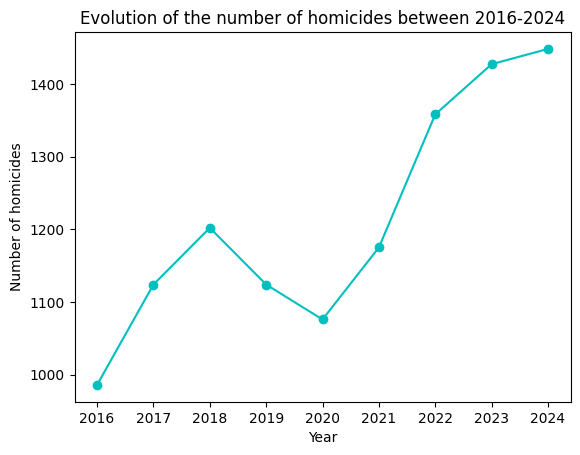

In [ ]:
#Plot the absolute evolution of homicides to vizualize the trend
plt.plot(df_total['Année'], df_total['Homicides (y compris coups et blessures volontaires suivis de mort)'], '-oc')
plt.title("Evolution of the number of homicides between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Number of homicides")
plt.show()

##Read Population Excel

In [ ]:
#Analyze the evolution of criminality with taking into account population growth:
path = "Intro-to-data-analysis-with-Python---Final-Project/Data/pop.xlsx"

xls_pop = pd.ExcelFile(path)
xls_pop.sheet_names



['France - Figure 1',
 'France - Figure 2',
 'France - Figure 3',
 'France - Figure 4',
 'France - Figure 5',
 'France - Figure 6',
 'UE - Figure 1',
 'UE - Figure 2',
 'UE - Figure 3']

In [ ]:
#Show the Excel File on the sheet France - Figure 2, in order to look at the "Ensemble" column for every year between 2016 to 2024
df_pop = pd.read_excel(path, sheet_name="France - Figure 2", skiprows=3)
df_pop = df_pop[0:-4] #Remove the last 4 rows which contained strings
df_pop.head(10)


,Année,Femmes,Hommes,Ensemble
0,2025,35326.405,33279.211,68605.616
1,2024,35254.976,33181.640,68436.616
2,2023,35172.311,33073.771,68246.082
3,2022,35092.520,32967.687,68060.207
4,2021,34930.005,32767.086,67697.091
5,2020,34812.046,32629.804,67441.850
6,2019,34722.069,32535.913,67257.982
7,2018,34594.401,32397.758,66992.159
8,2017,34477.222,32297.260,66774.482
9,2016,34372.558,32230.087,66602.645


In [ ]:
df_pop_années = df_pop.loc[1:9]
display(df_pop_années)

,Année,Femmes,Hommes,Ensemble
1,2024,35254.976,33181.640,68436.616
2,2023,35172.311,33073.771,68246.082
3,2022,35092.520,32967.687,68060.207
4,2021,34930.005,32767.086,67697.091
5,2020,34812.046,32629.804,67441.850
6,2019,34722.069,32535.913,67257.982
7,2018,34594.401,32397.758,66992.159
8,2017,34477.222,32297.260,66774.482
9,2016,34372.558,32230.087,66602.645


##Plotting population evolution

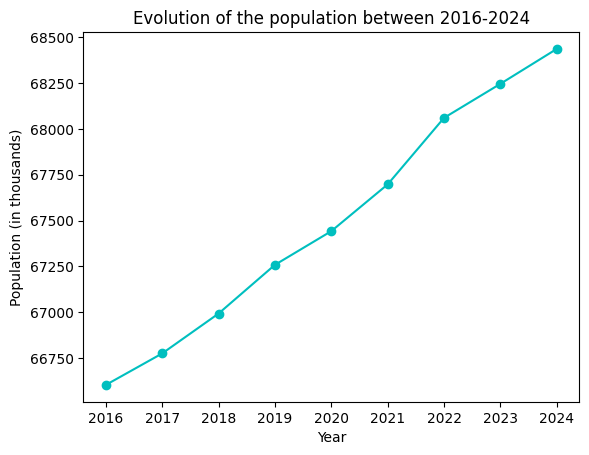

In [ ]:
#Plot the evolution of the pop to vizualize the trend
plt.plot(df_pop_années['Année'], df_pop_années['Ensemble'], '-oc')
plt.title("Evolution of the population between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Population (in thousands)")
plt.show()

##Add total pop on the same df as mec and plot their parallel evolution

In [ ]:
#Gather data on homicides and population on the same table to then plot their evolution on the same graph
df_total_hom = df_total[['Année', 'Homicides (y compris coups et blessures volontaires suivis de mort)']]
df_pop_années_ensemble = df_pop_années[['Année', 'Ensemble']]
df_merged = pd.merge(df_total_hom, df_pop_années_ensemble, on="Année")
df_merged_renamed = df_merged.rename(columns={"Ensemble": "Population"})
df_merged_renamed.head(10)

,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Population
0,2016,986,66602.645
1,2017,1124,66774.482
2,2018,1202,66992.159
3,2019,1124,67257.982
4,2020,1076,67441.850
5,2021,1175,67697.091
6,2022,1358,68060.207
7,2023,1427,68246.082
8,2024,1448,68436.616


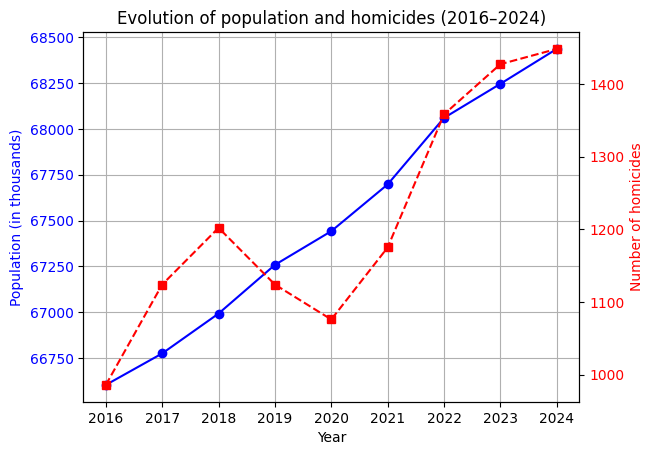

In [ ]:
#Plot the evolution of population and homicides on the same graph
fig, ax1 = plt.subplots()

# Population (left axis)
ax1.plot(
    df_merged_renamed['Année'],
    df_merged_renamed['Population'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Population'
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Population (in thousands)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Homicides (right axis)
ax2 = ax1.twinx()
ax2.plot(
    df_merged_renamed['Année'],
    df_merged_renamed['Homicides (y compris coups et blessures volontaires suivis de mort)'],
    marker='s',
    linestyle='--',
    color='red',
    label='Number of homicides'
)
ax2.set_ylabel("Number of homicides", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title
plt.title("Evolution of population and homicides (2016–2024)")

# Grid
ax1.grid(True)

plt.show()

##Compute the homicide rate

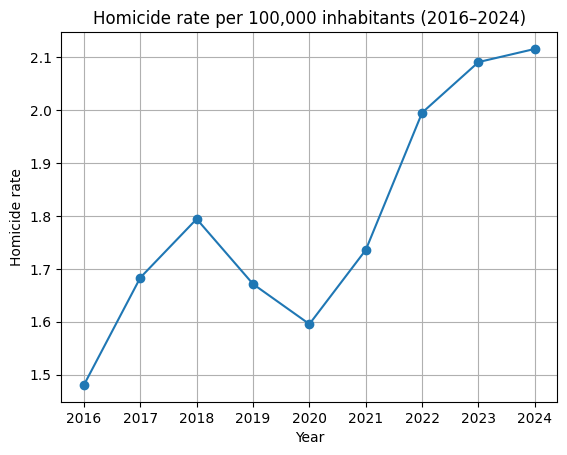

In [ ]:
#Calculate the homicide rate and plot it. The population number has been multiplied by 1000 as it was displayed in thousands people in the excelfile and the dataframes before
df_hom_rate = df_merged_renamed['Homicides (y compris coups et blessures volontaires suivis de mort)'] / (df_merged_renamed['Population']*1000) * 100_000
plt.plot(df_merged_renamed['Année'], df_hom_rate, marker='o')
plt.title("Homicide rate per 100,000 inhabitants (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Homicide rate")
plt.grid(True)
plt.show()



##Plotting absolute evolution of sexual violences and plot the sexual violences rate

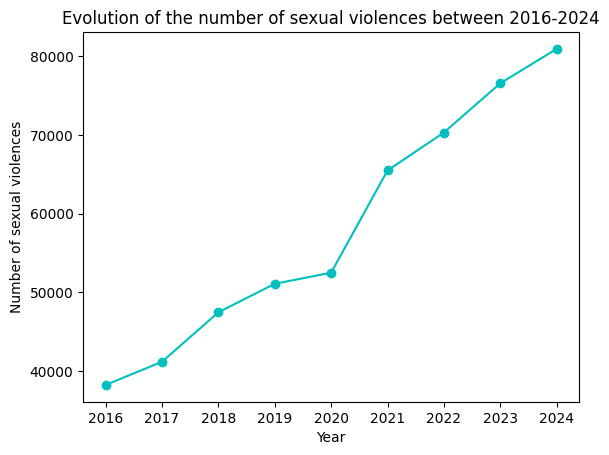

In [ ]:
#Plot the absolute evolution of sexual violence to vizualize the trend
plt.plot(df_total['Année'], df_total['Violences sexuelles'], '-oc')
plt.title("Evolution of the number of sexual violences between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Number of sexual violences")
plt.show()

In [ ]:
#Gather data on sexual violence and population on the same table to then plot their evolution on the same graph
df_total_sv = df_total[['Année', 'Violences sexuelles']]
df_merged_sv = pd.merge(df_total_sv, df_pop_années_ensemble, on="Année")
df_merged_sv_renamed = df_merged_sv.rename(columns={"Ensemble": "Population"})
df_merged_sv_renamed.head(10)

,Année,Violences sexuelles,Population
0,2016,38250,66602.645
1,2017,41195,66774.482
2,2018,47480,66992.159
3,2019,51090,67257.982
4,2020,52505,67441.850
5,2021,65480,67697.091
6,2022,70298,68060.207
7,2023,76549,68246.082
8,2024,80916,68436.616


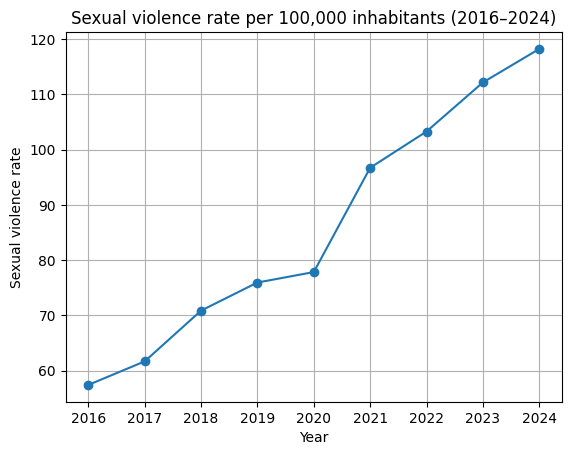

In [ ]:
#Calculate the sexual violence rate and plot it. The population number has been multiplied by 1000 as it was displayed in thousands people in the excelfile and the dataframes before
df_sv_rate = df_merged_sv_renamed['Violences sexuelles'] / (df_merged_sv_renamed['Population']*1000) * 100_000
plt.plot(df_merged_sv_renamed['Année'], df_sv_rate, marker='o')
plt.title("Sexual violence rate per 100,000 inhabitants (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Sexual violence rate")
plt.grid(True)
plt.show()

##Plotting the absolute evolution of physical domestic violence and it's rate

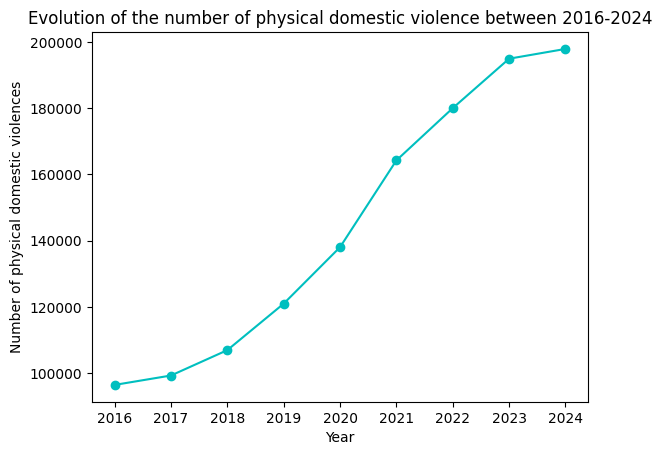

In [ ]:
#Plot the absolute evolution of physical domestic violence to vizualize the trend
plt.plot(df_total['Année'], df_total['Violences physiques dans le cadre intra-familial'], '-oc')
plt.title("Evolution of the number of physical domestic violence between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Number of physical domestic violences")
plt.show()

In [ ]:
#Gather data on domestic physical violence and population on the same table to then plot their evolution on the same graph
df_total_dpv = df_total[['Année', 'Violences physiques dans le cadre intra-familial']]
df_merged_dpv = pd.merge(df_total_dpv, df_pop_années_ensemble, on="Année")
df_merged_dpv_renamed = df_merged_dpv.rename(columns={"Ensemble": "Population"})
df_merged_dpv_renamed.head(10)

,Année,Violences physiques dans le cadre intra-familial,Population
0,2016,96392,66602.645
1,2017,99234,66774.482
2,2018,106902,66992.159
3,2019,120950,67257.982
4,2020,138026,67441.850
5,2021,164256,67697.091
6,2022,180057,68060.207
7,2023,195000,68246.082
8,2024,197954,68436.616


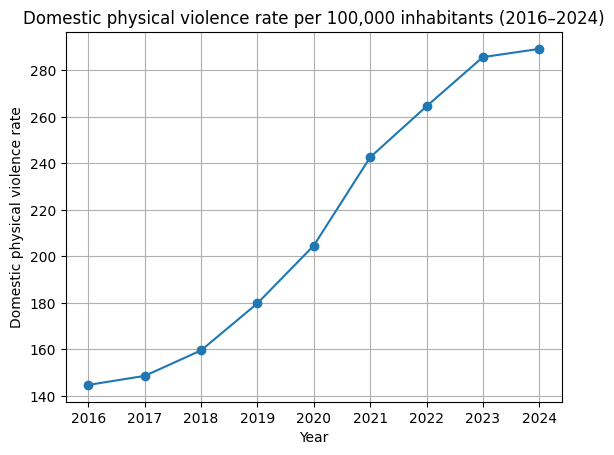

In [ ]:
#Calculate the domestic physical violence rate and plot it. The population number has been multiplied by 1000 as it was displayed in thousands people in the excelfile and the dataframes before
df_dpv_rate = df_merged_dpv_renamed['Violences physiques dans le cadre intra-familial'] / (df_merged_dpv_renamed['Population']*1000) * 100_000
plt.plot(df_merged_dpv_renamed['Année'], df_dpv_rate, marker='o')
plt.title("Domestic physical violence rate per 100,000 inhabitants (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Domestic physical violence rate")
plt.grid(True)
plt.show()

##Plotting the absolute evolution of non-violent theft and it's rate

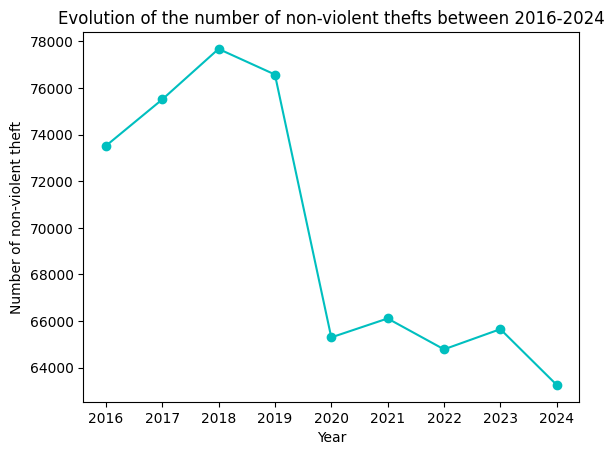

In [ ]:
#Plot the absolute evolution of non-violent thefts to vizualize the trend
plt.plot(df_total['Année'], df_total['Vols sans violence contre des personnes'], '-oc')
plt.title("Evolution of the number of non-violent thefts between 2016-2024")
plt.xlabel("Year")
plt.ylabel("Number of non-violent theft")
plt.show()

In [ ]:
#Gather data on non-violent thefts and population on the same table to then plot their evolution on the same graph
df_total_nvt = df_total[['Année', 'Vols sans violence contre des personnes']]
df_merged_nvt = pd.merge(df_total_nvt, df_pop_années_ensemble, on="Année")
df_merged_nvt_renamed = df_merged_nvt.rename(columns={"Ensemble": "Population"})
df_merged_nvt_renamed.head(10)

,Année,Vols sans violence contre des personnes,Population
0,2016,73516,66602.645
1,2017,75509,66774.482
2,2018,77679,66992.159
3,2019,76580,67257.982
4,2020,65298,67441.850
5,2021,66110,67697.091
6,2022,64785,68060.207
7,2023,65652,68246.082
8,2024,63258,68436.616


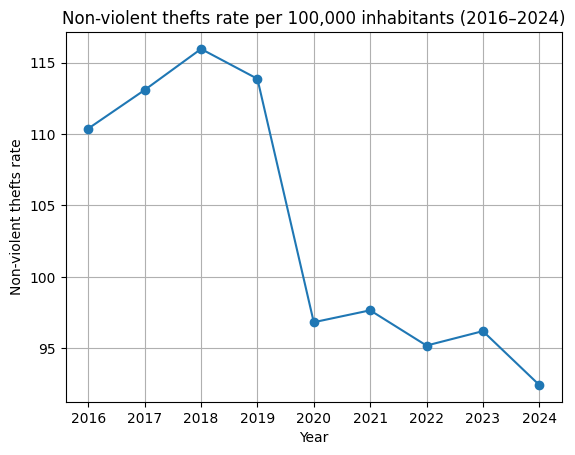

In [ ]:
#Calculate the non-violent thefts rate and plot it. The population number has been multiplied by 1000 as it was displayed in thousands people in the excelfile and the dataframes before
df_nvt_rate = df_merged_nvt_renamed['Vols sans violence contre des personnes'] / (df_merged_nvt_renamed['Population']*1000) * 100_000
plt.plot(df_merged_nvt_renamed['Année'], df_nvt_rate, marker='o')
plt.title("Non-violent thefts rate per 100,000 inhabitants (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Non-violent thefts rate")
plt.grid(True)
plt.show()

# **Part 2: What variables are most closely linked to committing a crime?**


## Sex

In [ ]:
#Reshaping the population data in long format (vs. wide format, where each category is in a separate column),
#so that each variable is in a single column, and there’s a column that indicates the category:
df_pop_années_long = df_pop_années.melt(
    id_vars='Année',
    value_vars=['Femmes', 'Hommes', 'Ensemble'],
    var_name='Sexe',
    value_name='Population'
)
df_pop_années_long.head()

,Année,Sexe,Population
0,2024,Femmes,35254.976
1,2023,Femmes,35172.311
2,2022,Femmes,35092.520
3,2021,Femmes,34930.005
4,2020,Femmes,34812.046


In [ ]:
#Mapping the different sex so that the slight variations in the different df do not affect the implementation of the code

sex_mapping = {
    'Femmes': 'female',
    'Femme': 'female',
    'Hommes': 'male',
    'Homme': 'male',
    'Ensemble': 'total',
    'Total': 'total'
    }


In [ ]:
#Safety step: inspection code to check which values exist in the Sexe column in two different DataFrames (including NaN):

print(df_pop_années_long['Sexe'].value_counts(dropna=False))
print(pivoted_df['Sexe'].value_counts(dropna=False))

Sexe
Femmes      9
Hommes      9
Ensemble    9
Name: count, dtype: int64
Sexe
Femme    9
Homme    9
Total    9
Name: count, dtype: int64


In [ ]:
#Copy created to not have to go on the top of the page to run the pivoted_df cell
pivoted_df_copy = pivoted_df.copy()


In [ ]:
#Standardization of the values in the Sexe column using the precedently created mapping dictionary:

df_pop_années_long['Sexe'] = df_pop_années_long['Sexe'].map(sex_mapping)

pivoted_df_copy['Sexe'] = pivoted_df_copy['Sexe'].map(sex_mapping)

### Sexual violences rate per 100k by sex

In [ ]:
#Computation of the totals (whole period) by sex (Sexe) from the two different DataFrames, on the variable violences sexuelles and on the variable population

sv_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Violences sexuelles']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [ ]:
#Compute the rate by sex for 100 000 individuals:

df_sv_rates_by_sex = pd.merge(sv_totals, pop_totals, on='Sexe')

df_sv_rates_by_sex['Rate per 100k'] = (
    df_sv_rates_by_sex['Violences sexuelles'] / (df_sv_rates_by_sex['Population']*1000) * 100_000
)
df_sv_rates_by_sex_renamed = df_sv_rates_by_sex.rename(columns={
    "Violences sexuelles": "Sexual violences",
    "Sexe": "Sex"
    })
df_sv_rates_by_sex_renamed

,Sex,Sexual violences,Population,Rate per 100k
0,female,22611,313428.108,7.214095
1,male,501152,294081.006,170.412910
2,total,523763,607509.114,86.214838


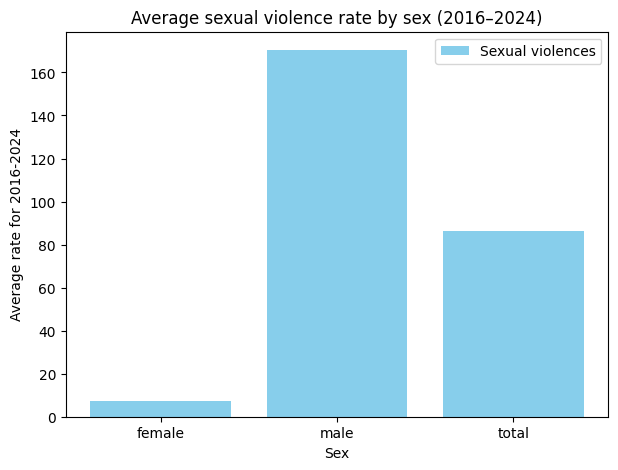

In [ ]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_sv_rates_by_sex_renamed["Sex"], df_sv_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Sexual violences')
plt.title("Average sexual violence rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()





###Homicides rate by sex

In [ ]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable Homicides and on the variable population

hom_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Homicides (y compris coups et blessures volontaires suivis de mort)']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [ ]:
#Compute the rate by 100 000 individuals:

df_hom_rates_by_sex = pd.merge(hom_totals, pop_totals, on='Sexe')

df_hom_rates_by_sex['Rate per 100k'] = (
    df_hom_rates_by_sex['Homicides (y compris coups et blessures volontaires suivis de mort)'] / (df_hom_rates_by_sex['Population']*1000) * 100_000
)
df_hom_rates_by_sex_renamed = df_hom_rates_by_sex.rename(columns={
    "Homicides (y compris coups et blessures volontaires suivis de mort)": "Homicides",
    "Sexe": "Sex"
    })
df_hom_rates_by_sex_renamed

,Sex,Homicides,Population,Rate per 100k
0,female,1549,313428.108,0.494212
1,male,9371,294081.006,3.186537
2,total,10920,607509.114,1.797504


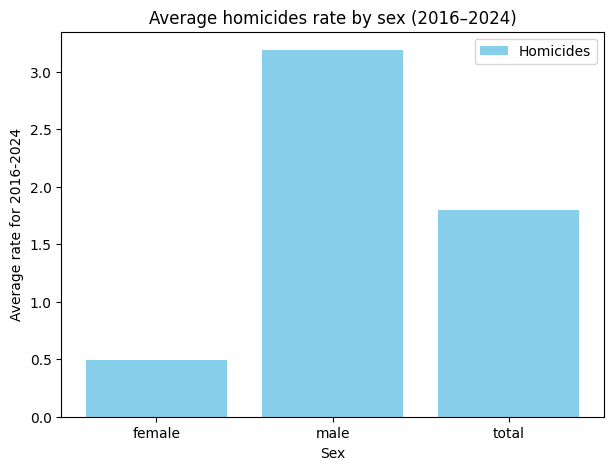

In [ ]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_hom_rates_by_sex_renamed["Sex"], df_hom_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Homicides')
plt.title("Average homicides rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

### Non-violent theft rate by sex

In [ ]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable Non-violent theft and on the variable population

nvt_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Vols sans violence contre des personnes']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [ ]:
#Compute the rate by 100 000 individuals:

df_nvt_rates_by_sex = pd.merge(nvt_totals, pop_totals, on='Sexe')

df_nvt_rates_by_sex['Rate per 100k'] = (
    df_nvt_rates_by_sex['Vols sans violence contre des personnes'] / (df_nvt_rates_by_sex['Population']*1000) * 100_000
)
df_nvt_rates_by_sex_renamed = df_nvt_rates_by_sex.rename(columns={
    "Vols sans violence contre des personnes": "Non-violent theft",
    "Sexe": "Sex"
    })
df_nvt_rates_by_sex_renamed

,Sex,Non-violent theft,Population,Rate per 100k
0,female,132778,313428.108,42.363144
1,male,495609,294081.006,168.528055
2,total,628387,607509.114,103.436637


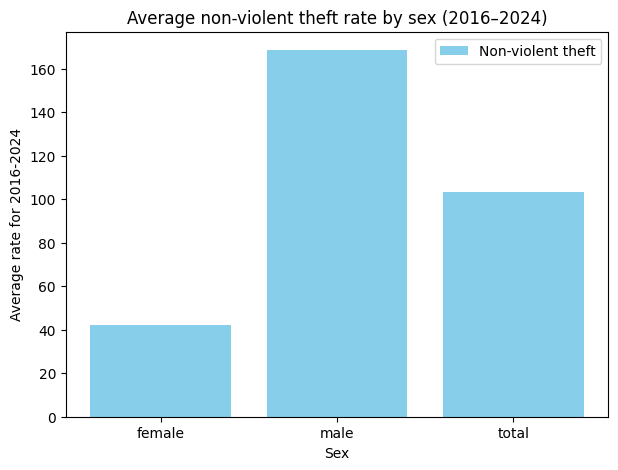

In [ ]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_nvt_rates_by_sex_renamed["Sex"], df_nvt_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Non-violent theft')
plt.title("Average non-violent theft rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

###Physical domestic violence

In [ ]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable physical domestic violence and on the variable population

pdv_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Violences physiques dans le cadre intra-familial']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [ ]:
#Compute the rate by 100 000 individuals:

df_pdv_rates_by_sex = pd.merge(pdv_totals, pop_totals, on='Sexe')

df_pdv_rates_by_sex['Rate per 100k'] = (
    df_pdv_rates_by_sex['Violences physiques dans le cadre intra-familial'] / (df_pdv_rates_by_sex['Population']*1000) * 100_000
)
df_pdv_rates_by_sex_renamed = df_pdv_rates_by_sex.rename(columns={
    "Violences physiques dans le cadre intra-familial": "Physical domestic violence",
    "Sexe": "Sex"
    })
df_pdv_rates_by_sex_renamed

,Sex,Physical domestic violence,Population,Rate per 100k
0,female,229060,313428.108,73.082150
1,male,1069711,294081.006,363.747055
2,total,1298771,607509.114,213.786258


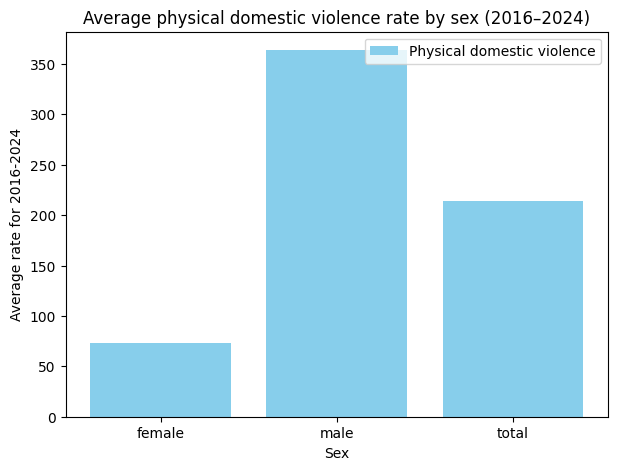

In [ ]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_pdv_rates_by_sex_renamed["Sex"], df_pdv_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Physical domestic violence')
plt.title("Average physical domestic violence rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

### Drug dealing incidents

In [ ]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable drug dealing incident and on the variable population

ddi_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Trafic de stupéfiants']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [ ]:
#Compute the rate by 100 000 individuals:

df_ddi_rates_by_sex = pd.merge(ddi_totals, pop_totals, on='Sexe')

df_ddi_rates_by_sex['Rate per 100k'] = (
    df_ddi_rates_by_sex['Trafic de stupéfiants'] / (df_ddi_rates_by_sex['Population']*1000) * 100_000
)
df_ddi_rates_by_sex_renamed = df_ddi_rates_by_sex.rename(columns={
    "Trafic de stupéfiants": "Drug dealing incidents",
    "Sexe": "Sex"
    })
df_ddi_rates_by_sex_renamed

,Sex,Drug dealing incidents,Population,Rate per 100k
0,female,36928,313428.108,11.781968
1,male,378338,294081.006,128.650947
2,total,415266,607509.114,68.355518


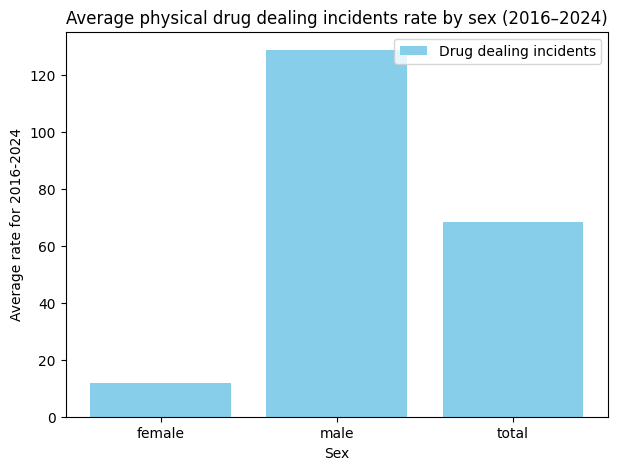

In [ ]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_ddi_rates_by_sex_renamed["Sex"], df_ddi_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Drug dealing incidents')
plt.title("Average physical drug dealing incidents rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

###Drug usage incidents

In [ ]:
#Computation of the totals by sex (Sexe) from the two different DataFrames, on the variable drug dealing incident and on the variable population

dui_totals = (
    pivoted_df_copy
    .groupby('Sexe')['Usage de stupéfiants']
    .sum()
    .reset_index()
)

pop_totals = (
    df_pop_années_long
    .groupby('Sexe')['Population']
    .sum()
    .reset_index()
)

In [ ]:
#Compute the rate by 100 000 individuals:

df_dui_rates_by_sex = pd.merge(dui_totals, pop_totals, on='Sexe')

df_dui_rates_by_sex['Rate per 100k'] = (
    df_dui_rates_by_sex['Usage de stupéfiants'] / (df_dui_rates_by_sex['Population']*1000) * 100_000
)
df_dui_rates_by_sex_renamed = df_dui_rates_by_sex.rename(columns={
    "Usage de stupéfiants": "Drug usage incidents",
    "Sexe": "Sex"
    })
df_dui_rates_by_sex_renamed

,Sex,Drug usage incidents,Population,Rate per 100k
0,female,162663,313428.108,51.898026
1,male,1760224,294081.006,598.550727
2,total,1922887,607509.114,316.519860


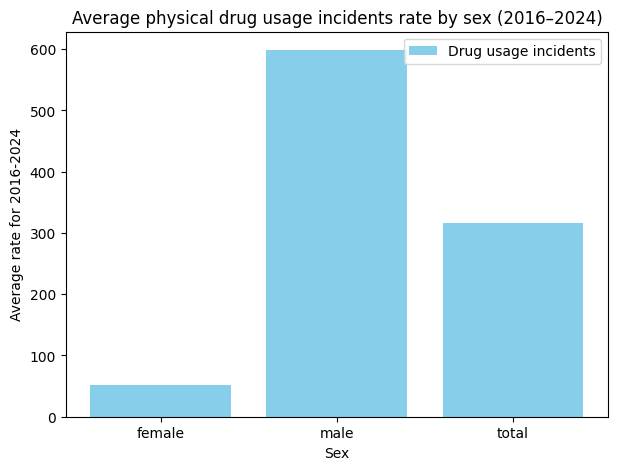

In [ ]:
#Plot barplots for different crime on the sex variable to see the criminality rate by sex,
# and then analyze for exemple which crimes women are the most likely to commit

plt.figure(figsize=(7,5))
plt.bar(df_dui_rates_by_sex_renamed["Sex"], df_dui_rates_by_sex_renamed["Rate per 100k"], color='skyblue', label='Drug usage incidents')
plt.title("Average physical drug usage incidents rate by sex (2016–2024)")
plt.xlabel("Sex")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

## Nationality

In [ ]:
#Show the Excel File on the sheet nationality, in order to look at the "total" line for every year and see the trend
path = "Intro-to-data-analysis-with-Python---Final-Project/Data/mec.xlsx"

#Read Excel on the sheet 2.nationalité, skipping the first 2 rows and setting multiple headers (years and categories)
df_nationality = pd.read_excel(path, sheet_name="2.nationalité", skiprows=2, header=[0, 1])

#Remove the 1st empty column of the sheet
df_nationality = df_nationality.iloc[:,1:]

#Pivot the year header
pivoted_nationality_df = (
    df_nationality
    .set_index("Nationalité")
    .stack(level=1, future_stack=True)          # move second header to rows & future_stack=True just allow us to avoid a warning
    .reset_index()           # make it a column
    .rename(columns={"level_1": "Année"})
  )

#Cast the type of Nationalité column from tupple to string
pivoted_nationality_df["Nationalité"] = pivoted_nationality_df["Nationalité"].str[0]

pivoted_nationality_df.head(15)

,Nationalité,Année,Homicides (y compris coups et blessures volontaires suivis de mort),Tentatives d'homicide,Violences physiques dans le cadre intra-familial,Violences physiques hors cadre intra-familial,Violences sexuelles,Viols et tentatives de viols,Vols avec arme,Vols violents sans arme,Vols sans violence contre des personnes,Cambriolages de logement,Vols de véhicule,Vols dans les véhicule,Vols d'accessoires sur les véhicules,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiements,Trafic de stupéfiants,Usage de stupéfiants
0,France,2016,837.0,1521.0,80605.0,111154.0,33198.0,9165.0,4840.0,15006.0,56959.0,31631.0,24097.0,20775.0,6319.0,70553.0,54998.0,35718.0,166710.0
1,France,2017,958.0,1739.0,82705.0,113866.0,35564.0,10020.0,4903.0,13100.0,57674.0,31114.0,21623.0,21300.0,6705.0,76188.0,55306.0,38124.0,171291.0
2,France,2018,992.0,1867.0,89319.0,121730.0,40837.0,11732.0,4564.0,12489.0,57478.0,29330.0,23593.0,21134.0,7577.0,77280.0,53152.0,38565.0,167786.0
3,France,2019,917.0,1926.0,100898.0,117929.0,44042.0,12966.0,4386.0,12453.0,54554.0,27647.0,20758.0,18575.0,7172.0,77285.0,52689.0,39681.0,158287.0
4,France,2020,875.0,2053.0,115523.0,107812.0,45623.0,14384.0,3983.0,10429.0,46516.0,22464.0,18569.0,16024.0,5728.0,69519.0,45892.0,34995.0,143491.0
5,France,2021,958.0,2237.0,136341.0,113868.0,56989.0,19374.0,3858.0,10532.0,45517.0,19381.0,18713.0,15036.0,4442.0,66177.0,47881.0,38949.0,196022.0
6,France,2022,1117.0,2428.0,149106.0,110269.0,60985.0,21723.0,3909.0,9393.0,43493.0,18245.0,17566.0,14742.0,5728.0,62675.0,43262.0,39531.0,219482.0
7,France,2023,1179.0,2835.0,162261.0,115865.0,66672.0,24334.0,4042.0,9553.0,45647.0,20429.0,20950.0,12845.0,6055.0,66005.0,42404.0,38809.0,233135.0
8,France,2024,1189.0,2726.0,165667.0,115465.0,70609.0,25051.0,3971.0,9030.0,44733.0,20057.0,21331.0,14679.0,5981.0,61988.0,41289.0,41001.0,254170.0
9,Afrique,2016,77.0,184.0,10426.0,9065.0,2657.0,949.0,516.0,2607.0,8868.0,2851.0,918.0,2866.0,269.0,4021.0,5071.0,2857.0,9498.0


In [ ]:
#Analyze the evolution of criminality with taking into account change in population. A new excel has to be downloaded, showing the structure of population by nationality:
path = "Intro-to-data-analysis-with-Python---Final-Project/Data/pop_e.xlsx"

xls_pop_e = pd.ExcelFile(path)
xls_pop_e.sheet_names

['Sommaire',
 'Figure 1',
 'Figure 2',
 'Figure 3',
 'Figure 4',
 'Figure 5',
 'Figure 6',
 'Question 1',
 'Question 2',
 'Question 3',
 'Question 4',
 'Question 5',
 'Question 6']

In [ ]:
#Show the Excel File on the sheet Figure 5 – Population étrangère et immigrée en France, in order to look at the "Etrangers, effectif (en milliers)" column for every year between 2016 to 2024
df_pop_e = pd.read_excel(path, sheet_name="Figure 5", skiprows=2, header=[0])
df_pop_e = df_pop_e[0:-5] #Remove the last 5 rows which contained strings
df_pop_e = df_pop_e.iloc[1:].reset_index(drop=True)
df_pop_e = df_pop_e.drop(df_pop_e.columns[[2, 3, 4, 5, 6, 7]], axis=1)

df_pop_e.head(10)

,Année,Étrangers
0,2024 (p),6028
1,2023 (p),5622
2,2022,5331
3,2021,5235.9
4,2020,5149.2
5,2019,5000
6,2018,4849.9
7,2017,4703.8
8,2016,4541.5
9,2015,4427.9


In [ ]:
df_pop_e_années = df_pop_e.loc[0:8]
display(df_pop_e_années)


,Année,Étrangers
0,2024 (p),6028
1,2023 (p),5622
2,2022,5331
3,2021,5235.9
4,2020,5149.2
5,2019,5000
6,2018,4849.9
7,2017,4703.8
8,2016,4541.5


In [ ]:
# Convert 'Année' to string, then remove "(p)" if present, then convert to int
# Clean both DataFrames
for df in [df_pop_années_ensemble, df_pop_e_années]:
    df['Année'] = df['Année'].astype(str).str.replace(r" \([pP]\)", "", regex=True).astype(int)

/tmp/ipython-input-1104563096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Année'] = df['Année'].astype(str).str.replace(r" \([pP]\)", "", regex=True).astype(int)
/tmp/ipython-input-1104563096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Année'] = df['Année'].astype(str).str.replace(r" \([pP]\)", "", regex=True).astype(int)


In [ ]:
df_pop_ensemble_e_merged = pd.merge(
    df_pop_années_ensemble,
    df_pop_e_années,
    on="Année",
    how="left"  # keeps all years from left DF
)
df_pop_ensemble_e_merged.head(10)

,Année,Ensemble,Étrangers
0,2024,68436.616,6028
1,2023,68246.082,5622
2,2022,68060.207,5331
3,2021,67697.091,5235.9
4,2020,67441.850,5149.2
5,2019,67257.982,5000
6,2018,66992.159,4849.9
7,2017,66774.482,4703.8
8,2016,66602.645,4541.5


In [ ]:
#Calculating the number of the population that is not foreign
df_pop_ensemble_e_merged['Français'] = (
    df_pop_ensemble_e_merged['Ensemble'] - df_pop_ensemble_e_merged['Étrangers']
)
df_pop_ensemble_e_merged.head()

,Année,Ensemble,Étrangers,Français
0,2024,68436.616,6028,62408.616
1,2023,68246.082,5622,62624.082
2,2022,68060.207,5331,62729.207
3,2021,67697.091,5235.9,62461.191
4,2020,67441.850,5149.2,62292.65


In [ ]:
#Reshaping the population data in long format (vs. wide format, where each category is in a separate column),
#so that each variable is in a single column, and there’s a column that indicates the category (Nationalité):
df_pop_ensemble_e_long = df_pop_ensemble_e_merged.melt(
    id_vars='Année',
    value_vars=['Étrangers', 'Français', 'Ensemble'],
    var_name='Nationalité',
    value_name='Population'
)
df_pop_ensemble_e_long.head(30)

,Année,Nationalité,Population
0,2024,Étrangers,6028
1,2023,Étrangers,5622
2,2022,Étrangers,5331
3,2021,Étrangers,5235.9
4,2020,Étrangers,5149.2
5,2019,Étrangers,5000
6,2018,Étrangers,4849.9
7,2017,Étrangers,4703.8
8,2016,Étrangers,4541.5
9,2024,Français,62408.616


In [ ]:
nationality_mapping = {
    'France': 'French',
    'Français': 'French',
    'Afrique': 'Foreigners',
    'Amérique , Océanie': 'Foreigners',
    'Asie': 'Foreigners',
    'Europe hors UE': 'Foreigners',
    'UE hors France': 'Foreigners',
    'Étrangers': 'Foreigners',
    'Ensemble': 'Total',
    'Total': 'Total'
    }

In [ ]:
df_pop_ensemble_e_long['Nationalité'] = df_pop_ensemble_e_long['Nationalité'].map(nationality_mapping)

pivoted_nationality_df['Nationalité'] = pivoted_nationality_df['Nationalité'].map(nationality_mapping)

In [ ]:
#Computation of the totals (for the whole period 2016-2024) by nationality (Nationalité) from the two different DataFrames, on the variable violences sexuelles and on the variable population

nat_sv_totals = (
    pivoted_nationality_df
    .groupby('Nationalité')['Violences sexuelles']
    .sum()
    .reset_index()
)

nat_pop_totals = (
    df_pop_ensemble_e_long
    .groupby('Nationalité')['Population']
    .sum()
    .reset_index()
)

In [ ]:
#Compute the rate by nationality for 100 000 individuals:

df_sv_rates_by_nationality = pd.merge(nat_sv_totals, nat_pop_totals, on='Nationalité')

df_sv_rates_by_nationality['Rate per 100k'] = (
    df_sv_rates_by_nationality['Violences sexuelles'] / (df_sv_rates_by_nationality['Population']*1000) * 100_000
)
df_sv_rates_by_nationality_renamed = df_sv_rates_by_nationality.rename(columns={
    "Violences sexuelles": "Sexual violences",
    "Nationalité": "Nationality"
    })
df_sv_rates_by_nationality_renamed

,Nationality,Sexual violences,Population,Rate per 100k
0,Foreigners,69244.0,46461.3,149.035864
1,French,454519.0,561047.814,81.012525
2,Total,523763.0,607509.114,86.214838


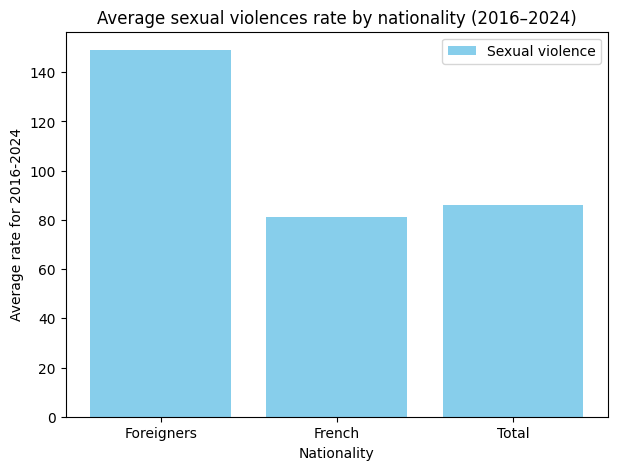

In [ ]:
#Plot barplots for different crime on the nationality variable to see the criminality rate by nationality,
# and then analyze for exemple which crimes there is a surrepresentation of foreigners/French

plt.figure(figsize=(7,5))
plt.bar(df_sv_rates_by_nationality_renamed["Nationality"], df_sv_rates_by_nationality_renamed["Rate per 100k"], color='skyblue', label='Sexual violence')
plt.title("Average sexual violences rate by nationality (2016–2024)")
plt.xlabel("Nationality")
plt.ylabel("Average rate for 2016-2024")
plt.legend()
plt.show()

##Age

In [ ]:
#Read Excel File - total accused people and display the sheets' names

path = "Intro-to-data-analysis-with-Python---Final-Project/Data/mec.xlsx"

xls = pd.ExcelFile(path)
xls.sheet_names

In [ ]:
#Show the Excel File on the sheet age, in order to look at the "total" line for each category of offense by age range and see the trend

#Read Excel on the sheet 1.sexe - age, skipping the first 2 rows and setting multiple headers (sex, year and categories)
df_age = pd.read_excel(path, sheet_name="1.sexe - age", skiprows=2, header=[0, 1])

print(df_age.columns[:5])

#Remove the 1st empty column of the sheet
df_age = df_age.iloc[:,1:]

#Flatten MultiIndex : merge both level with "_", ignore empty
df_age.columns = ['_'.join([str(i) for i in col if i]).strip() for col in df_age.columns]

print(df_age.columns[:5])

#Fill columns properly and rename them

df_age["Sexe_Unnamed: 1_level_1"] = df_age["Sexe_Unnamed: 1_level_1"].ffill()
df_age["Age_Unnamed: 2_level_1"] = df_age["Age_Unnamed: 2_level_1"].ffill()

df_age = df_age.rename(columns={
    "Sexe_Unnamed: 1_level_1": "Sexe",
    "Age_Unnamed: 2_level_1": "Age"
})

#Vérify the result
print(df_age.columns[:5])

In [ ]:
#Define identification columns

id_vars_age = ["Sexe", "Age"]
value_vars_age = [col for col in df_age.columns if col not in id_vars_age]

#Transform table into long version
df_long_age = df_age.melt(
    id_vars=id_vars_age,
    value_vars=value_vars_age,
    var_name="Infraction_Année",
    value_name="Nombre"
)

#Separate infraction and year
df_long_age[["Infraction", "Année"]] = df_long_age["Infraction_Année"].str.rsplit("_", n=1, expand=True)
df_long_age["Année"] = df_long_age["Année"].astype(int)
df_long_age = df_long_age.drop(columns="Infraction_Année")

#Verification
df_long_age.head()

In [ ]:
#Filter for adults between 18-59

adultes = ["18 à 29 ans", "30 à 44 ans", "45 à 59 ans"]
df_adultes = df_long_age[df_long_age["Age"].isin(adultes)]

#Verification
df_adultes.head()

In [ ]:
#Visualize just the total lines
df_total = df_adultes[df_adultes["Sexe"] == "Total"]
display(df_total)

# Part 3: For which groups is it possible to see an increase in committing crimes

##Nationality

In [ ]:
#Diagnosing the column: shows what values are actually in the Nationalité column
pivoted_nationality_df['Nationalité'].value_counts(dropna=False)

,count
Nationalité,
Foreigners,45
French,9
Total,9
NaN,9


In [ ]:
total_table_by_nationality = (
    pivoted_nationality_df
    .assign(
        Total_crimes=lambda d: d[d.columns.difference(['Année', 'Nationalité'])].sum(axis=1)
    )
    .groupby(['Nationalité', 'Année'])['Total_crimes']
    .sum()
    .reset_index()
)
total_table_by_nationality

,Nationalité,Année,Total_crimes
0,Foreigners,2016,117046.0
1,Foreigners,2017,128209.0
2,Foreigners,2018,141194.0
3,Foreigners,2019,144998.0
4,Foreigners,2020,141133.0
5,Foreigners,2021,163030.0
6,Foreigners,2022,179156.0
7,Foreigners,2023,178842.0
8,Foreigners,2024,182689.0
9,French,2016,724086.0


In [ ]:
#Compute the crime rate by nationality for 100 000 individuals by year:

df_crime_rates_by_nationality_by_year = pd.merge(total_table_by_nationality, df_pop_ensemble_e_long, on=['Nationalité', 'Année'])

df_crime_rates_by_nationality_by_year['Rate per 100k'] = (
    df_crime_rates_by_nationality_by_year['Total_crimes'] / (df_crime_rates_by_nationality_by_year['Population']*1000) * 100_000
)
df_crime_rates_by_nationality_by_year_renamed = df_crime_rates_by_nationality_by_year.rename(columns={
    "Nationalité": "Nationality",
    "Année": "Year"
    })
df_crime_rates_by_nationality_by_year_renamed

,Nationality,Year,Total_crimes,Population,Rate per 100k
0,Foreigners,2016,117046.0,4541.5,2577.254211
1,Foreigners,2017,128209.0,4703.8,2725.647349
2,Foreigners,2018,141194.0,4849.9,2911.276521
3,Foreigners,2019,144998.0,5000,2899.96
4,Foreigners,2020,141133.0,5149.2,2740.872369
5,Foreigners,2021,163030.0,5235.9,3113.695831
6,Foreigners,2022,179156.0,5331,3360.645282
7,Foreigners,2023,178842.0,5622,3181.109925
8,Foreigners,2024,182689.0,6028,3030.673524
9,French,2016,724086.0,62061.145,1166.730005


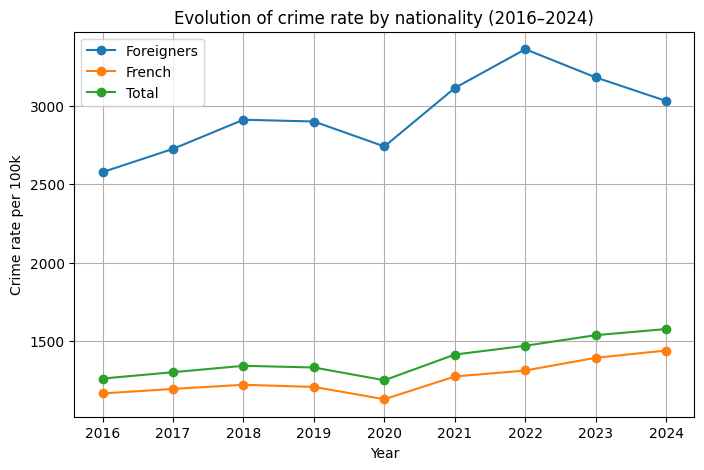

In [ ]:
plt.figure(figsize=(8, 5))

for nationality in df_crime_rates_by_nationality_by_year_renamed['Nationality'].unique():
    df_subset = df_crime_rates_by_nationality_by_year_renamed[
        df_crime_rates_by_nationality_by_year_renamed['Nationality'] == nationality
    ]

    plt.plot(
        df_subset['Year'],
        df_subset['Rate per 100k'],
        marker='o',
        label=nationality
    )

plt.title("Evolution of crime rate by nationality (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Crime rate per 100k")
plt.legend()
plt.grid(True)
plt.show()

##Sex

In [ ]:
pivoted_df_copy_2 = pivoted_df.copy()

In [ ]:
sex_mapping = {
    'Femmes': 'female',
    'Femme': 'female',
    'female': 'female',
    'Hommes': 'male',
    'Homme': 'male',
    'male': 'male',
    'Ensemble': 'total',
    'Total': 'total',
    'total': 'total'
    }


df_pop_années_long['Sexe'] = df_pop_années_long['Sexe'].map(sex_mapping)

pivoted_df_copy_2['Sexe'] = pivoted_df_copy_2['Sexe'].map(sex_mapping)

In [ ]:
total_table_by_sex = (
    pivoted_df_copy_2
    .assign(
        Total_crimes=lambda d: d[d.columns.difference(['Année', 'Sexe'])].sum(axis=1)
    )
    .groupby(['Sexe', 'Année'])['Total_crimes']
    .sum()
    .reset_index()
)
total_table_by_sex

,Sexe,Année,Total_crimes
0,female,2016,111008
1,female,2017,113814
2,female,2018,116038
3,female,2019,115842
4,female,2020,107233
5,female,2021,119578
6,female,2022,120827
7,female,2023,133331
8,female,2024,136836
9,male,2016,729335


In [ ]:
#Compute the crime rate by sex for 100 000 individuals by year:

df_crime_rates_by_sex_by_year = pd.merge(total_table_by_sex, df_pop_années_long, on=['Sexe', 'Année'])

df_crime_rates_by_sex_by_year['Rate per 100k'] = (
    df_crime_rates_by_sex_by_year['Total_crimes'] / (df_crime_rates_by_sex_by_year['Population']*1000) * 100_000
)
df_crime_rates_by_sex_by_year_renamed = df_crime_rates_by_sex_by_year.rename(columns={
    "Sexe": "Sex",
    "Année": "Year"
    })
df_crime_rates_by_sex_by_year_renamed

display(df_crime_rates_by_sex_by_year_renamed)

,Sex,Year,Total_crimes,Population,Rate per 100k
0,female,2016,111008,34372.558,322.955306
1,female,2017,113814,34477.222,330.113604
2,female,2018,116038,34594.401,335.424221
3,female,2019,115842,34722.069,333.626432
4,female,2020,107233,34812.046,308.034179
5,female,2021,119578,34930.005,342.336052
6,female,2022,120827,35092.520,344.309842
7,female,2023,133331,35172.311,379.079441
8,female,2024,136836,35254.976,388.132444
9,male,2016,729335,32230.087,2262.901121


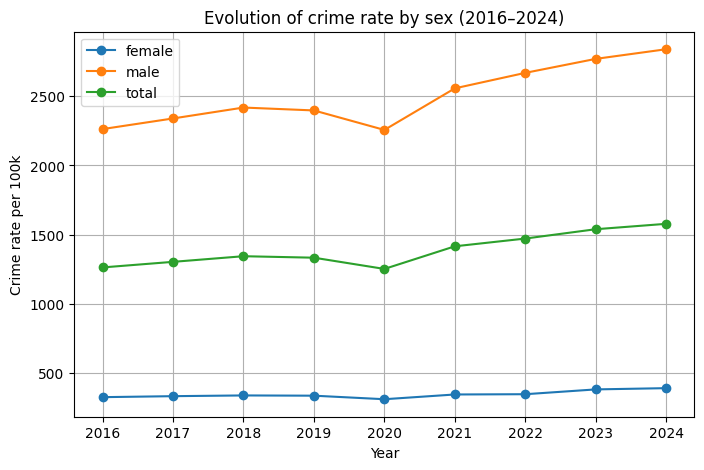

In [ ]:
plt.figure(figsize=(8, 5))

for sex in df_crime_rates_by_sex_by_year_renamed['Sex'].unique():
    df_subset_sex = df_crime_rates_by_sex_by_year_renamed[
        df_crime_rates_by_sex_by_year_renamed['Sex'] == sex
    ]

    plt.plot(
        df_subset_sex['Year'],
        df_subset_sex['Rate per 100k'],
        marker='o',
        label=sex
    )

plt.title("Evolution of crime rate by sex (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Crime rate per 100k")
plt.legend()
plt.grid(True)
plt.show()

# Essais Lucie beginning

In [ ]:
df_pop_ensemble_e_merged = pd.merge(df_pop_années_ensemble, df_pop_e_années, on="Année")
df_pop_ensemble_e_merged.head(10)

,Année,Ensemble,Étrangers
0,2022,68060.207,5331
1,2021,67697.091,5235.9
2,2020,67441.850,5149.2
3,2019,67257.982,5000
4,2018,66992.159,4849.9
5,2017,66774.482,4703.8
6,2016,66602.645,4541.5


In [ ]:
#Gather data on foreigner and general population on the same table

years_mapping = {
    '2024 (p)': '2024',
    '2024': '2024',
    '2023 (p)': '2023',
    '2023': '2023',
    '2022': '2022',
    '2021': '2021',
    '2020': '2020',
    '2019': '2019',
    '2018': '2018',
    '2017': '2017',
    '2016': '2016',
    }

df_pop_années_ensemble['Année'] = df_pop_années_ensemble['Année'].map(years_mapping).fillna(df_pop_années_ensemble['Année'])
df_pop_e_années['Année'] = df_pop_e_années['Année'].map(years_mapping).fillna(df_pop_e_années['Année'])
print(df_pop_e_années)

  Année Étrangers
0  2024      6028
1  2023      5622
2  2022      5331
3  2021    5235.9
4  2020    5149.2
5  2019      5000
6  2018    4849.9
7  2017    4703.8
8  2016    4541.5


/tmp/ipython-input-3971198961.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pop_années_ensemble['Année'] = df_pop_années_ensemble['Année'].map(years_mapping).fillna(df_pop_années_ensemble['Année'])
/tmp/ipython-input-3971198961.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_années_ensemble['Année'] = df_pop_années_ensemble['Année'].map(years_mapping).fillna(df_pop_années_ensemble['Année'])
/tmp/ipython-input-3971198961.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
#Show Excel File - Total accused people

df = pd.read_excel(path, sheet_name="5.PM - PP")
df.head()

ValueError: Worksheet named '5.PM - PP' not found

In [ ]:
#Only work with lines about individuals "personnes physiques" and not companies "personnes morales"

df_PP = df.iloc[1::2].reset_index(drop=True)
df_PP.head()

In [ ]:
#Trial for first visualisation

df_PP_numeric = df_PP.select_dtypes(include="number")

df_PP_numeric.mean().plot(kind="bar", figsize=(10,5))
plt.title("Moyenne par année – Personnes physiques")
plt.xlabel("Année")
plt.ylabel("Valeur moyenne")
plt.show()

In [ ]:
df_numeric = df_PP.select_dtypes(include="number")

df_numeric.index = df_PP.index  # garder les lignes comme index

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for idx, row in df_numeric.iterrows():
    plt.plot(df_numeric.columns, row, marker='o', label=f'Infraction {idx}')

plt.title("Évolution des types d'infraction – Personnes physiques")
plt.xlabel("Année")
plt.ylabel("Nombre / Valeur")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # légende à côté
plt.grid(True)
plt.tight_layout()
plt.show()

test